<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-01-28 11:13:36--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
169.63.118.104ourses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  73.6MB/s    in 2.7s    

2025-01-28 11:13:41 (73.6 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


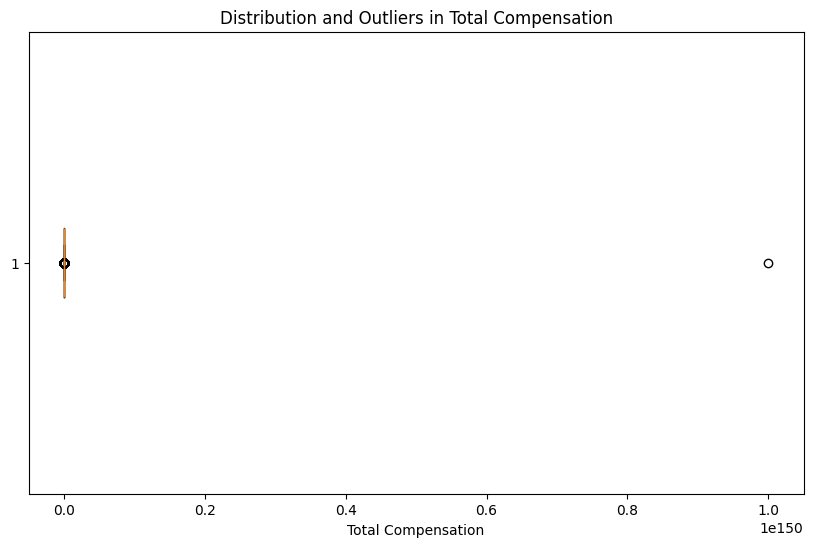

In [25]:
# your code goes here

conn = sqlite3.connect('survey-results-public.sqlite')

# Query to select total compensation data from the 'main' table
QUERY = "SELECT CompTotal FROM main WHERE CompTotal IS NOT NULL"
df = pd.read_sql_query(QUERY, conn)

# Close the connection
conn.close()

# Create a box plot for total compensation
plt.figure(figsize=(10, 6))
plt.boxplot(df['CompTotal'], vert=False)
plt.title('Distribution and Outliers in Total Compensation')
plt.xlabel('Total Compensation')
plt.show()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


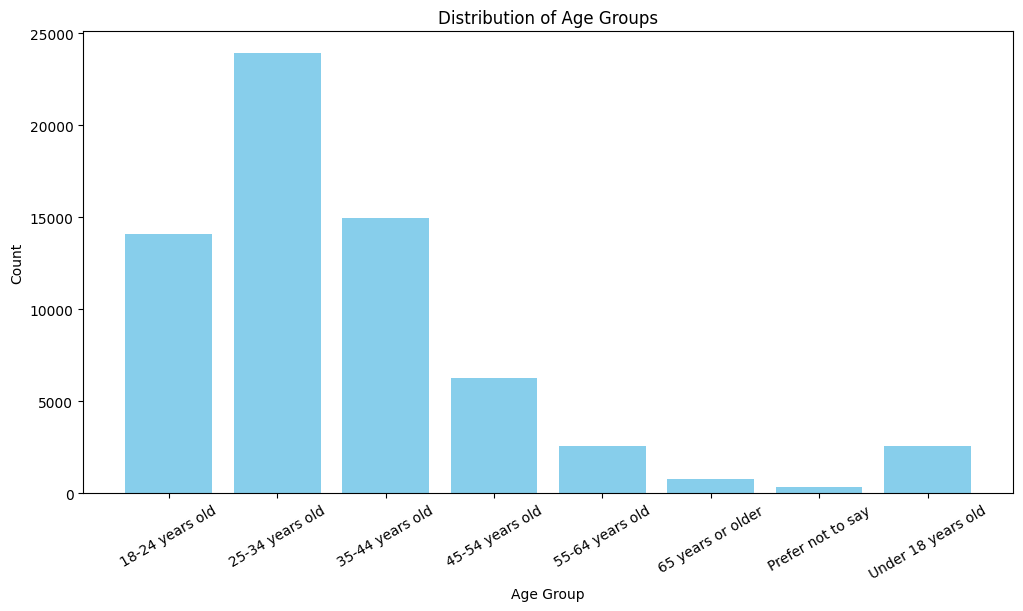

In [14]:
# your code goes here

conn = sqlite3.connect('survey-results-public.sqlite')

QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)

# Close the connection
conn.close()

# Convert Age column to numerical values
age_mapping = {
    'Under 18 years old': 0,
    '18-24 years old': 1,
    '25-34 years old': 2,
    '35-44 years old': 3,
    '45-54 years old': 4,
    '55-64 years old': 5,
    '65 years or older': 6,
    'Prefer not to say': 7
}
df_age['Age_numeric'] = df_age['Age'].map(age_mapping)

# Visualize the distribution of age groups
plt.figure(figsize=(12, 6))
plt.bar(df_age['Age'], df_age['count'], color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Age Groups')
plt.xticks(rotation=30)
plt.show()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


/opt/conda/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 2000x600 with 0 Axes>

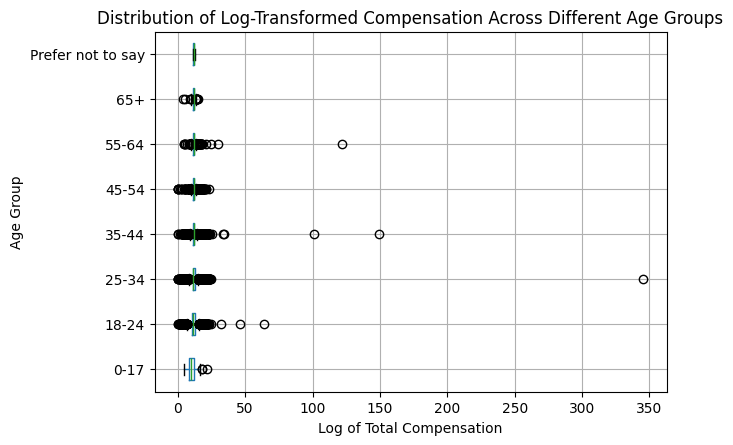

In [26]:
# your code goes here

!pip install numpy
import numpy as np

conn = sqlite3.connect('survey-results-public.sqlite')

# Query to select age and total compensation data from the 'main' table
QUERY = """
SELECT Age, CompTotal 
FROM main 
WHERE CompTotal IS NOT NULL AND Age IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Close the connection
conn.close()

# Convert Age column to numerical values
age_mapping = {
    'Under 18 years old': '0-17',
    '18-24 years old': '18-24',
    '25-34 years old': '25-34',
    '35-44 years old': '35-44',
    '45-54 years old': '45-54',
    '55-64 years old': '55-64',
    '65 years or older': '65+',
    'Prefer not to say': 'Prefer not to say'
}
df['Age_group'] = df['Age'].map(age_mapping)

# Handle skewness by applying log transformation to compensation data
df['log_CompTotal'] = np.log(df['CompTotal'])

# Visualize the distribution of compensation across different age groups using log-transformed data
plt.figure(figsize=(20, 6))
df.boxplot(column='log_CompTotal', by='Age_group', vert=False)
plt.title('Distribution of Log-Transformed Compensation Across Different Age Groups')
plt.xlabel('Log of Total Compensation')
plt.ylabel('Age Group')
plt.suptitle('')
plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


/opt/conda/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 1200x600 with 0 Axes>

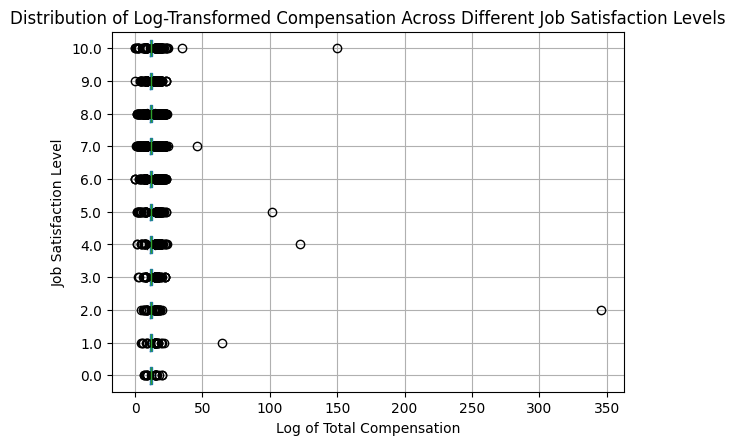

In [27]:
# your code goes here

conn = sqlite3.connect('survey-results-public.sqlite')

# Query to select job satisfaction and total compensation data from the 'main' table
QUERY = """
SELECT JobSat, CompTotal 
FROM main 
WHERE CompTotal IS NOT NULL AND JobSat IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Close the connection
conn.close()

# Handle skewness by applying log transformation to compensation data
df['Log_CompTotal'] = np.log(df['CompTotal'])

# Visualize the distribution of compensation across different job satisfaction levels using log-transformed data
plt.figure(figsize=(12, 6))
df.boxplot(column='Log_CompTotal', by='JobSat', vert=False)
plt.title('Distribution of Log-Transformed Compensation Across Different Job Satisfaction Levels')
plt.xlabel('Log of Total Compensation')
plt.ylabel('Job Satisfaction Level')
plt.suptitle('')
plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


/tmp/ipykernel_752/493858337.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_5['Log_ConvertedCompYearly'] = np.log(df_top_5['ConvertedCompYearly'])


<Figure size 1200x600 with 0 Axes>

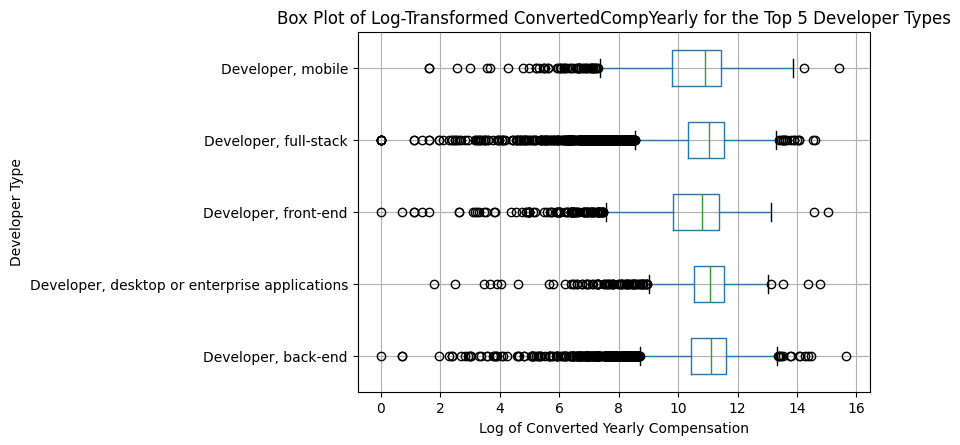

In [23]:
# your code goes here

conn = sqlite3.connect('survey-results-public.sqlite')

# Query to select developer type and yearly compensation data from the 'main' table
QUERY = """
SELECT DevType, ConvertedCompYearly 
FROM main 
WHERE ConvertedCompYearly IS NOT NULL AND DevType IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Close the connection
conn.close()

# Split the DevType column into multiple rows
df = df.assign(DevType=df['DevType'].str.split(';')).explode('DevType')

# Get the top 5 developer types by count
top_5_dev_types = df['DevType'].value_counts().nlargest(5).index

# Filter the DataFrame to include only the top 5 developer types
df_top_5 = df[df['DevType'].isin(top_5_dev_types)]

# Handle skewness by applying log transformation to compensation data
df_top_5['Log_ConvertedCompYearly'] = np.log(df_top_5['ConvertedCompYearly'])

# Create a box plot for log-transformed yearly compensation across the top 5 developer types
plt.figure(figsize=(12, 6))
df_top_5.boxplot(column='Log_ConvertedCompYearly', by='DevType', vert=False)
plt.title('Box Plot of Log-Transformed ConvertedCompYearly for the Top 5 Developer Types')
plt.xlabel('Log of Converted Yearly Compensation')
plt.ylabel('Developer Type')
plt.suptitle('')
plt.show()

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


/opt/conda/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_752/1397391265.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_5['Log_CompTotal'] = np.log(df_top_5['CompTotal'])


<Figure size 1200x600 with 0 Axes>

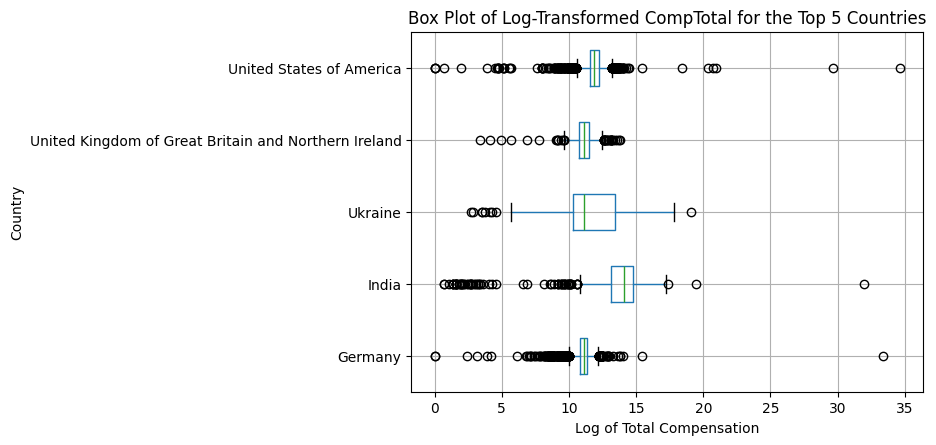

In [28]:
# your code goes here

conn = sqlite3.connect('survey-results-public.sqlite')

# Query to select country and total compensation data from the 'main' table
QUERY = """
SELECT Country, CompTotal 
FROM main 
WHERE CompTotal IS NOT NULL AND Country IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Close the connection
conn.close()

# Get the top 5 countries by count
top_5_countries = df['Country'].value_counts().nlargest(5).index

# Filter the DataFrame to include only the top 5 countries
df_top_5 = df[df['Country'].isin(top_5_countries)]

# Handle skewness by applying log transformation to compensation data
df_top_5['Log_CompTotal'] = np.log(df_top_5['CompTotal'])

# Create a box plot for log-transformed total compensation across the top 5 countries
plt.figure(figsize=(12, 6))
df_top_5.boxplot(column='Log_CompTotal', by='Country', vert=False)
plt.title('Box Plot of Log-Transformed CompTotal for the Top 5 Countries')
plt.xlabel('Log of Total Compensation')
plt.ylabel('Country')
plt.suptitle('')
plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


/opt/conda/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4655: RuntimeWarning: invalid value encountered in multiply
  lerp_interpolation = asanyarray(add(a, diff_b_a * t, out=out))
/opt/conda/lib/python3.12/site-packages/matplotlib/cbook.py:1267: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/opt/conda/lib/python3.12/site-packages/matplotlib/cbook.py:1274: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/opt/conda/lib/python3.12/site-packages/matplotlib/cbook.py:1282: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/opt/conda/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4655: RuntimeWarning: invalid value encountered in add
  lerp_interpolation = asanyarray(add(a, diff_b_a * t, out=out

<Figure size 1500x1500 with 0 Axes>

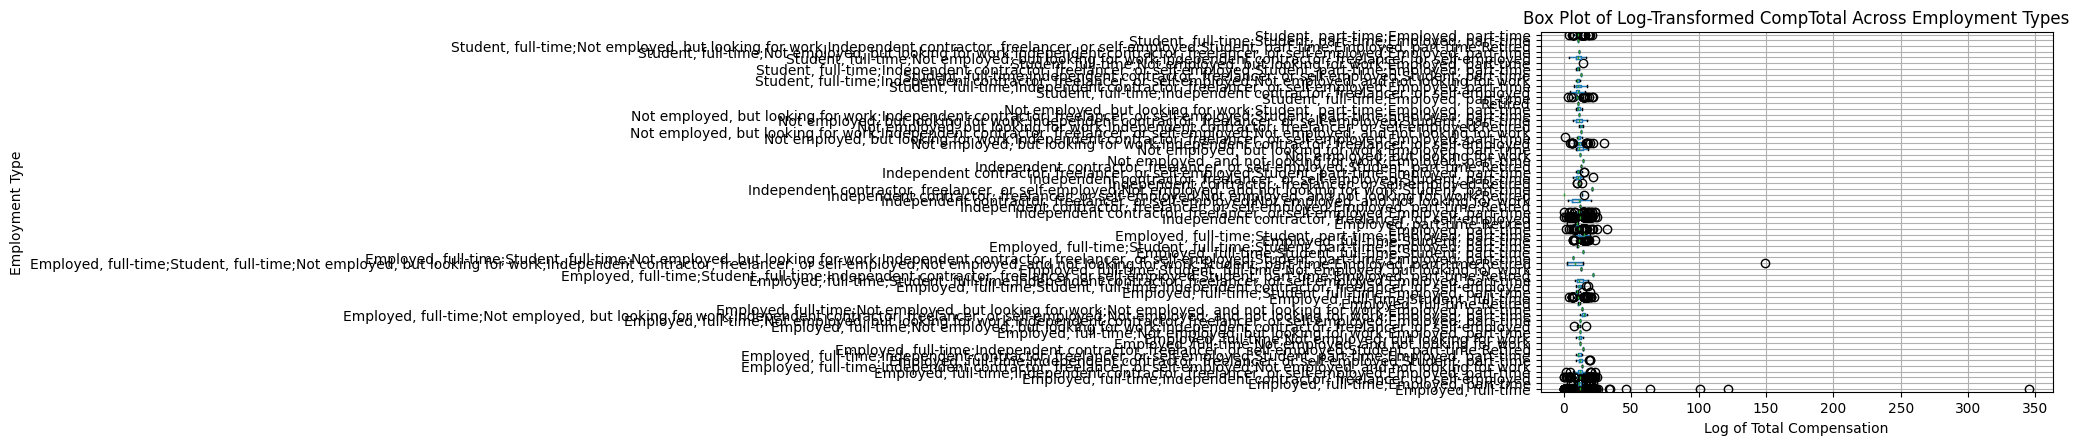

In [33]:
# your code goes here

conn = sqlite3.connect('survey-results-public.sqlite')

# Query to select employment type and total compensation data from the 'main' table
QUERY = """
SELECT Employment, CompTotal 
FROM main 
WHERE CompTotal IS NOT NULL AND Employment IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Close the connection
conn.close()

# Handle skewness by applying log transformation to compensation data
df['Log_CompTotal'] = np.log(df['CompTotal'])

# Create a box plot for log-transformed total compensation across different employment types
plt.figure(figsize=(15, 15))
df.boxplot(column='Log_CompTotal', by='Employment', vert=False)
plt.title('Box Plot of Log-Transformed CompTotal Across Employment Types')
plt.xlabel('Log of Total Compensation')
plt.ylabel('Employment Type')
plt.suptitle('')
plt.show()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


<Figure size 1200x600 with 0 Axes>

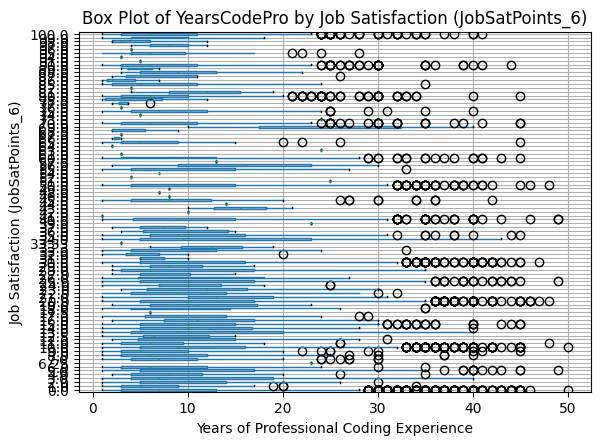

In [38]:
# your code goes here

conn = sqlite3.connect('survey-results-public.sqlite')

# Query to select years of professional coding experience and job satisfaction data from the 'main' table
QUERY = """
SELECT YearsCodePro, JobSatPoints_6 
FROM main 
WHERE YearsCodePro IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Close the connection
conn.close()

# Convert YearsCodePro to numeric values, handling non-numeric entries
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Create a box plot for years of professional coding experience by job satisfaction (JobSatPoints_6)
plt.figure(figsize=(12, 6))
boxplot = df.boxplot(column='YearsCodePro', by='JobSatPoints_6', vert=False)

# Customize y-ticks for better visibility
plt.yticks(rotation=0)
plt.title('Box Plot of YearsCodePro by Job Satisfaction (JobSatPoints_6)')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.suptitle('')
plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [ ]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
